<a href="https://colab.research.google.com/github/Carlosrbrj/DataValidation/blob/main/Produto_Valida%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validação de Dados - BIUD

Esse notebook tem como objetivo criar validar os dados dos clientes antes de subir na plataforma. Para, isso dividi essa análise em três partes, que também forma 3 datasets. Aqui, iremos iniciar análise a partir dos dados de vendas.

Sendo assim, o código abaixo importar todos os pacotes que poderemos usar nessa análise.

In [5]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Agora, vamos importar a biblioteca que permite importar um dataset a partir de um link público do google.

In [6]:
# Esse é o link que será o caminho público do arquivo que montamos.
link_csv = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTPDr0wnod3ioP_agARkQn_OCMOTe_P_d9HfBgXG73nVYg4vZ1eOJiorJ62Px5gNuqP4-Rk32ABvbkA/pub?output=csv'

In [7]:
# Lê o arquivo
dataset = pd.read_csv(link_csv)

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,description,Total_value,Quantidade
0,2 MINI CREK,13678.78,10.300.000
1,2 MINI CREK,6108.02,4.140.000
2,2 MINI CREK CHOCO C/ MORANGO iFOOD,29.98,2.2000
3,2 MINI CREK CHOCOLATE AO LEITE IFOOD,14.99,1.2000
4,2 PIZZAS CREK CHOCOLATE AO LEITE,41272.79,32.860.000
5,ABOBRINHA VEG TRAD,189.00,10.2000
6,AC AGUA COM GAS,7.90,7.980.000
7,AC AGUA CREK,0.49,520.000
8,AC AGUA SEM GAS,12.20,12.340.000
9,AC BAURU,1826.95,22.230.000


## 1. Análise descritivas

Uma vez carregado o dataset, vamos começar as análises do dataset identificando o seu tamanho, e as informações inciais.

In [8]:
# Mostra as dimensões do dataset
dataset.shape

(869, 3)

In [9]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  869 non-null    object 
 1   Total_value  869 non-null    float64
 2   Quantidade   869 non-null    object 
dtypes: float64(1), object(2)
memory usage: 20.5+ KB


Inicialmente, podemos observar que existem 869 SKUs

---



In [13]:
# verificando nulls no dataset
dataset.isnull().sum()

description    0
Total_value    0
Quantidade     0
dtype: int64

Inicialmente, observamos que não existe nenhum valor nulo em nenhum dos atributos, indicando que todas os produtos tiveram algum lançamento, ainda que zero.
Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, no novo dataset, vamos trocar todos os valores zero por Na.

<Axes: >

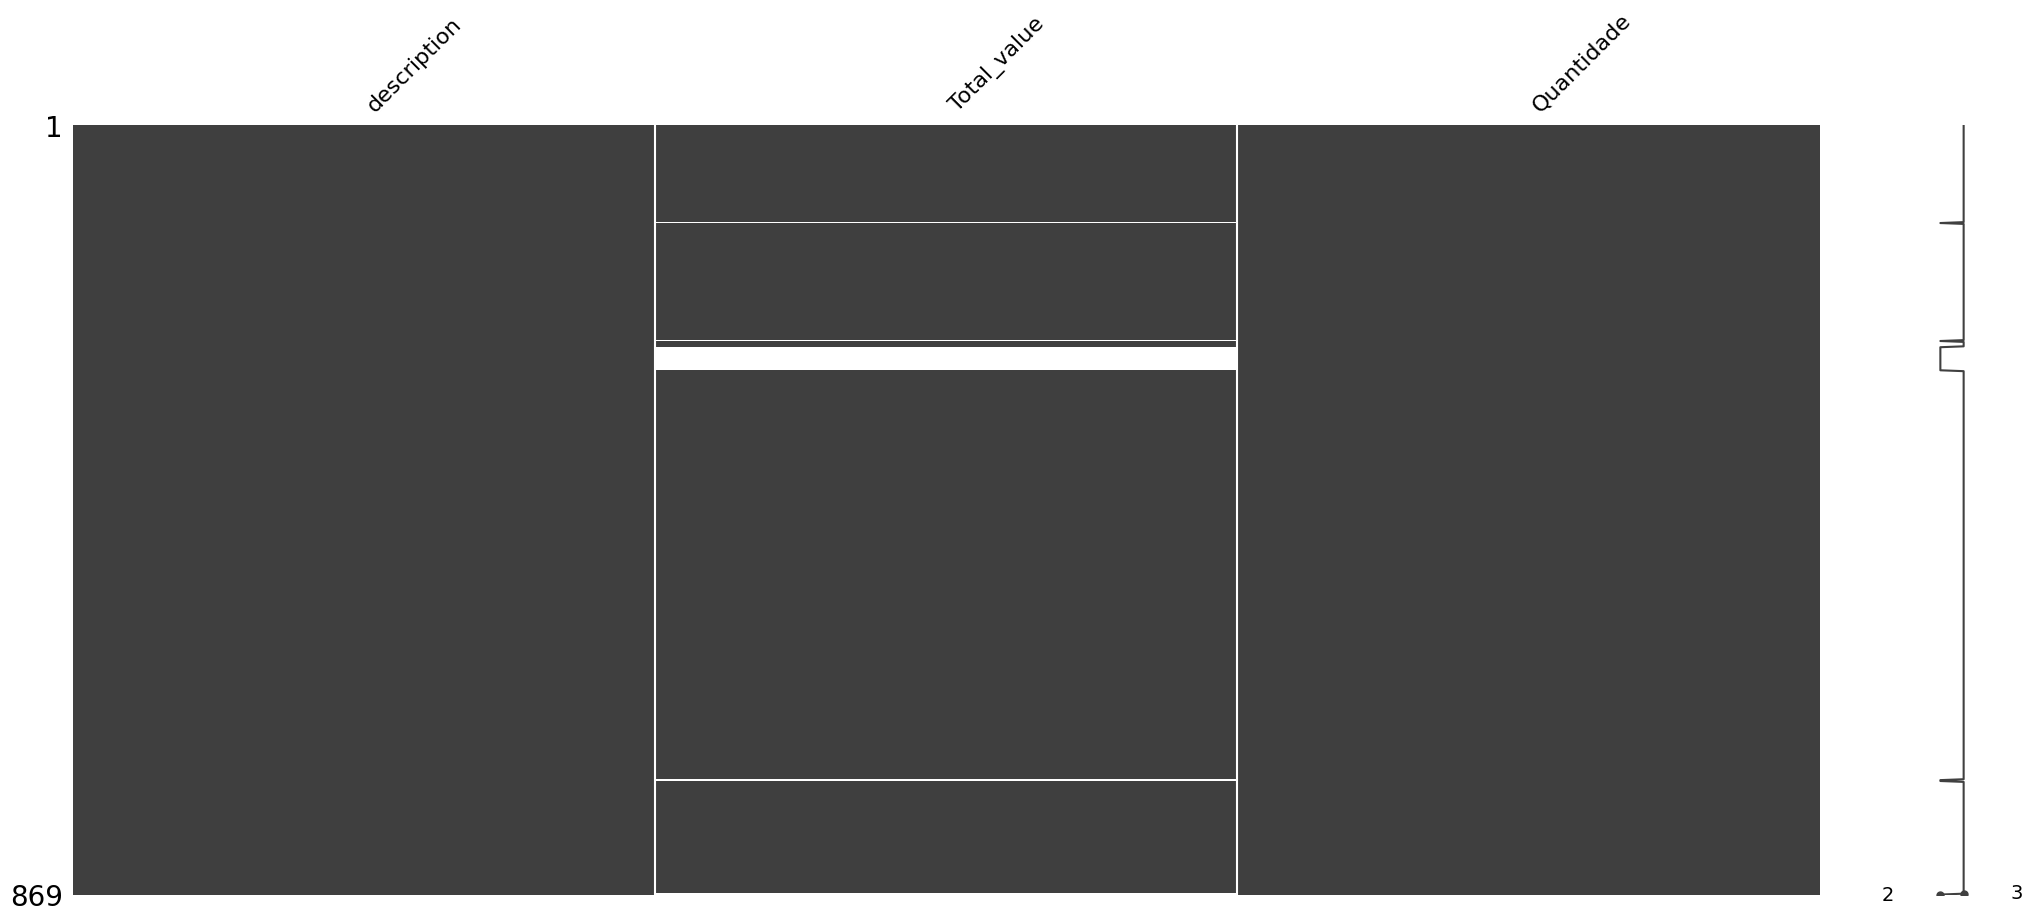

In [14]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
crek = dataset[col[:]]

# substituindo os zeros por NaN
crek.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(crek)

Com essa visualização, podemos observar que existem valores agora considerados nulo no Dataset transformado. Com isso, podemos concluir que, aqui, existem valores negativos no Total_value, ainda que não exista valores negativos nas quantidades vendidas.


In [15]:
# verificando nulls no dataset
crek.isnull().sum()

description     0
Total_value    33
Quantidade      0
dtype: int64

## 1.2 Visualizações Unimodais

Agora, vamos anáise visualmente como estão distribuídos esse dataset olhando para os atributos Id e Total_valeu.

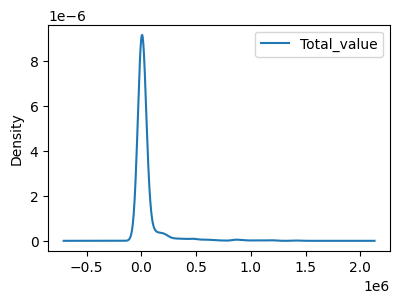

In [17]:
# Density Plot
crek.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

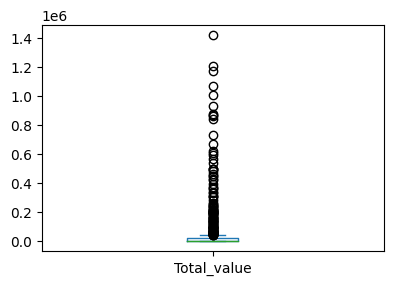

In [18]:
# Boxplot
crek.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

A partir do gráfico de desindade, temos uma outra visualização no problema de vendas de produtos por um valor zero neste dataset. Além disso, algumas vendas se destacam, mostrando que pode haver erros para cima também.
